In [2]:
import CVFunctions as cv
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

# load template images
filenames = os.listdir('dataset')
images = []
for filename in filenames:
    images.append(cv2.imread('dataset/' + filename,0))

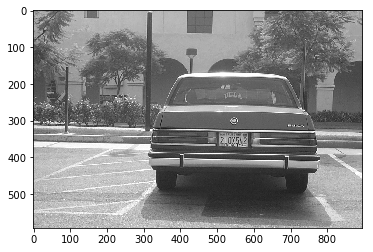

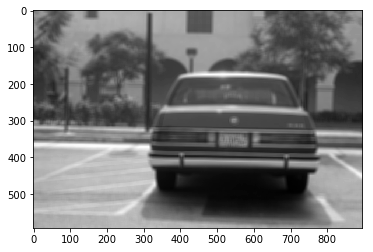

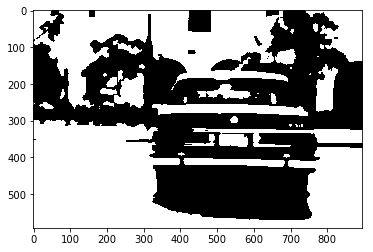

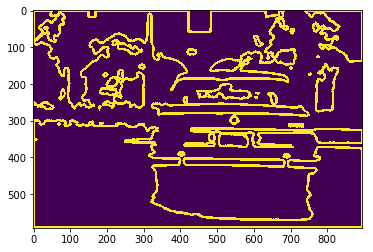

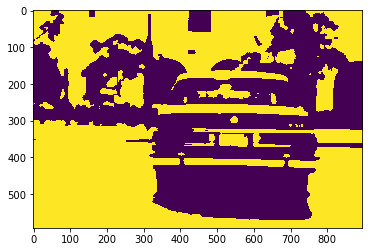

In [3]:
original_img = images[1]
cv.draw(original_img)
img = original_img
img = cv2.GaussianBlur(img, (11,11), 20)
cv.draw(img)
img = cv.thresh(img,115, 255, cv2.THRESH_BINARY)
cv.draw(img)
contours = cv.findContours(img)

cv.draw(cv.imageFromContours(contours,img),gray=False)
cv.draw(cv.maskFromContours(contours,img),gray=False)

2.13513513514


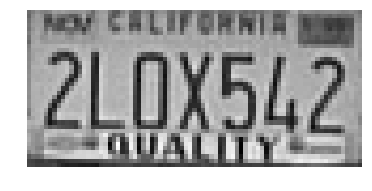

In [4]:
def possiblePlates(image):
    original_img = image
    img = original_img
    img = cv2.GaussianBlur(img, (11,11), 20)
    img = cv.thresh(img,115, 255, cv2.THRESH_BINARY)
    contours = cv.findContours(img)
    contours = cv.getLargeContours(contours,original_img.shape)
    possible_plate_contours = []
    for i in range(len(contours)):
        x,y,w,h = cv2.boundingRect(contours[i])
        aspect = cv.aspectRatio(w,h)
        if (aspect > 1.8) and (aspect < 3):
            print aspect
            possible_plate_contours.append(contours[i])
    if len(possible_plate_contours) != 0:
        sub_images = []
        for contour in possible_plate_contours:
            x,y,w,h = cv2.boundingRect(contour)
            sub_images.append(original_img[y:y+h,x:x+w])
        return sub_images
    return [np.zeros(image.shape)]

cv.display(possiblePlates(images[1]))

2.64705882353


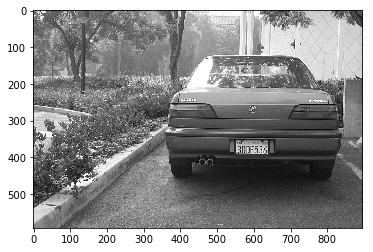

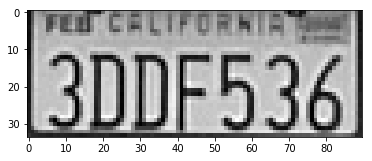

In [5]:
# 7,8
#for i in range(2,10):
    #cv.display(possiblePlates(images[i]))
cv.draw(images[7])
cv.draw(possiblePlates(images[7])[0])

NameError: name 'np' is not defined

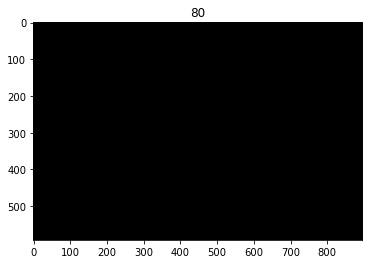

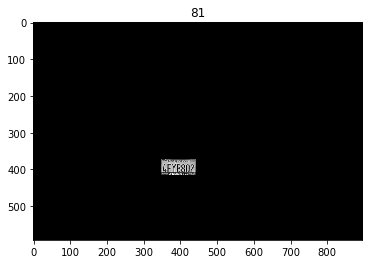

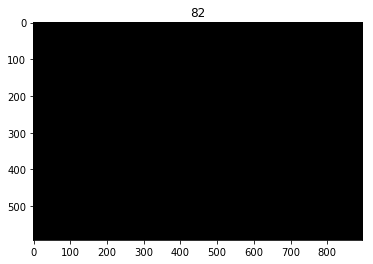

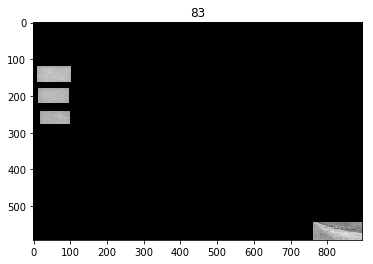

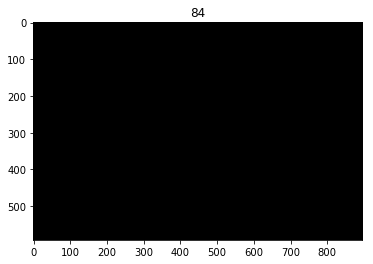

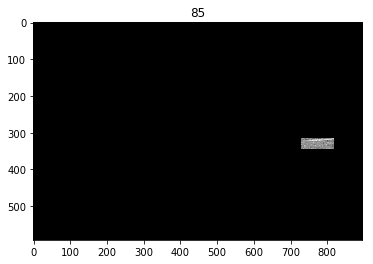

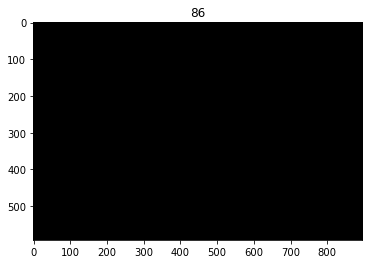

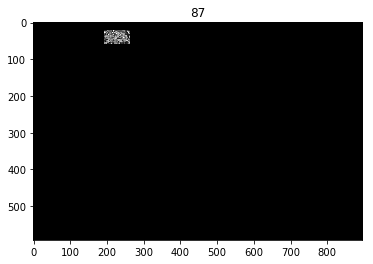

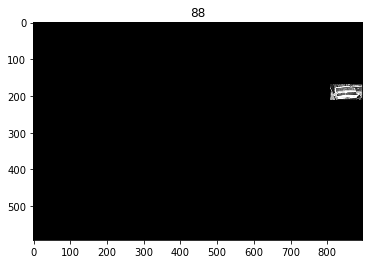

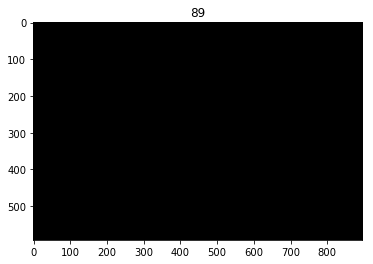

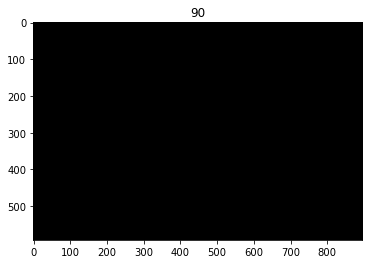

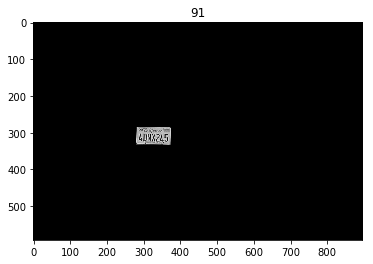

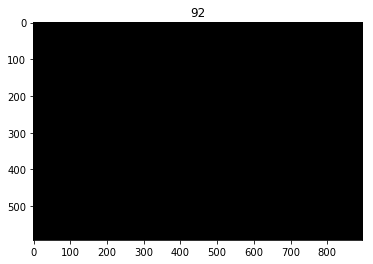

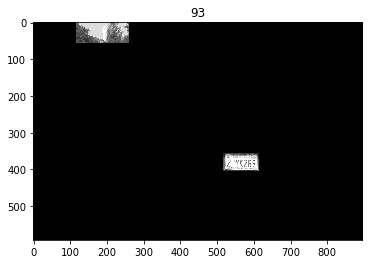

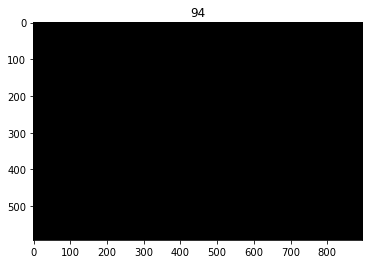

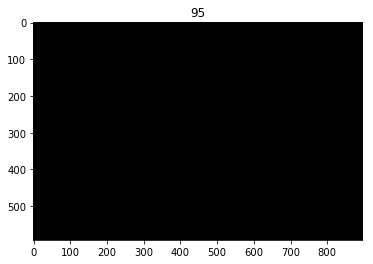

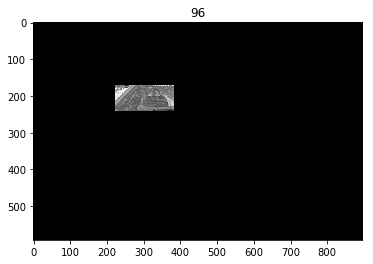

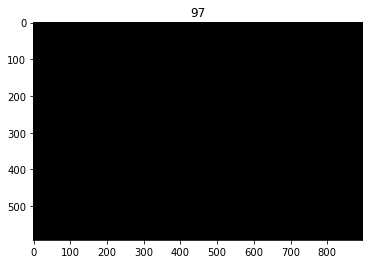

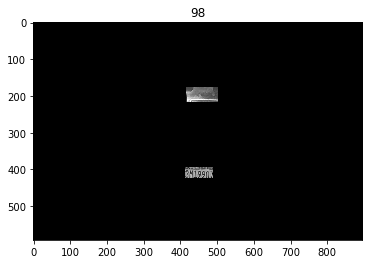

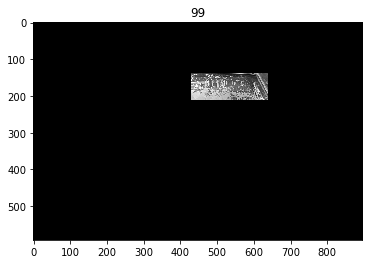

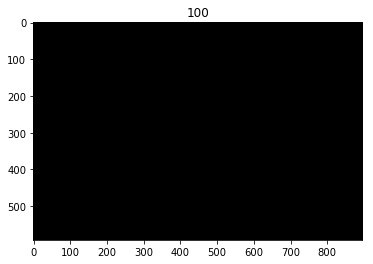

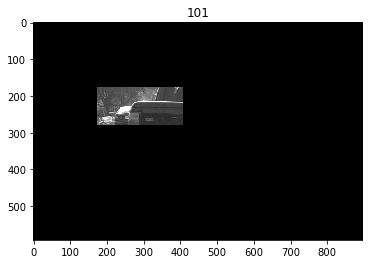

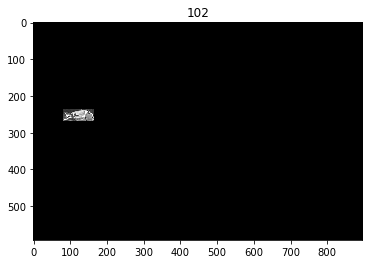

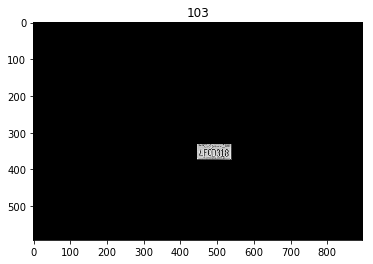

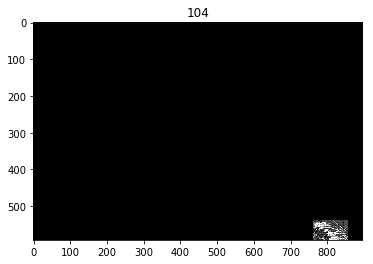

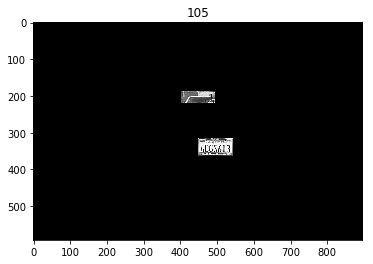

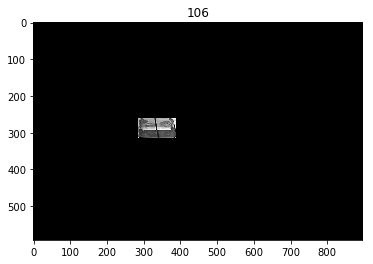

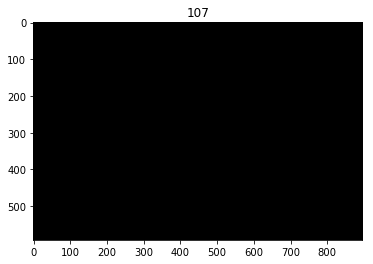

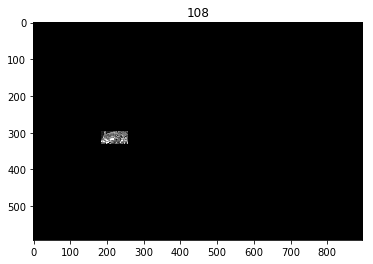

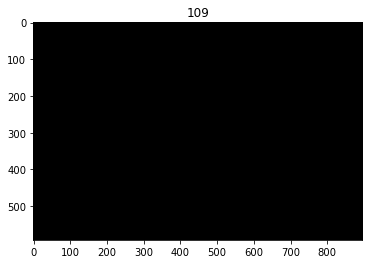

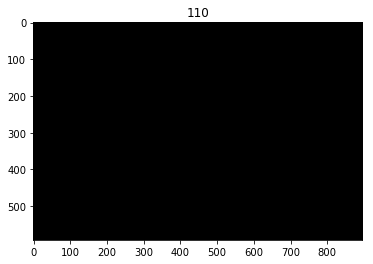

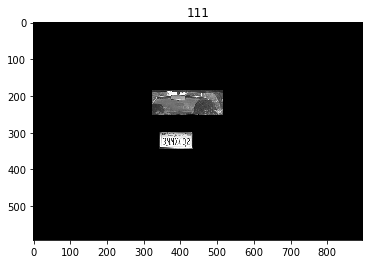

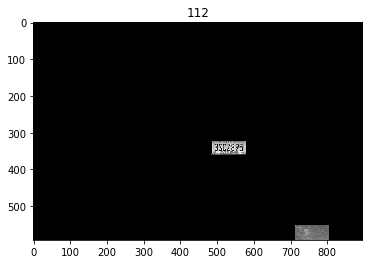

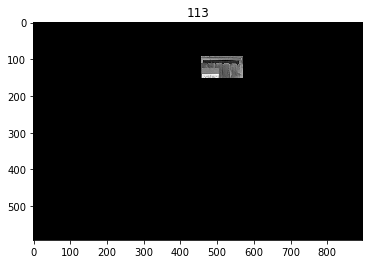

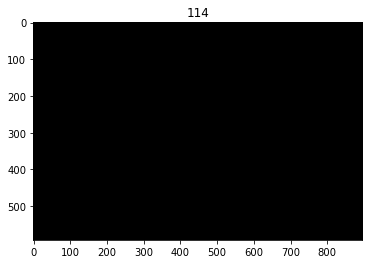

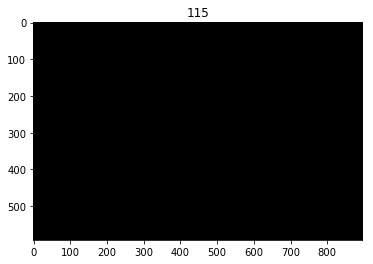

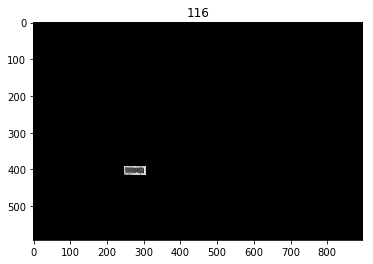

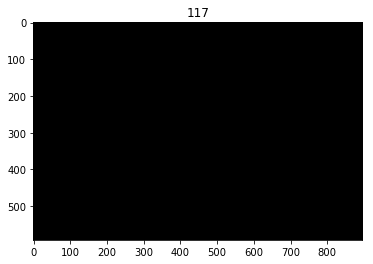

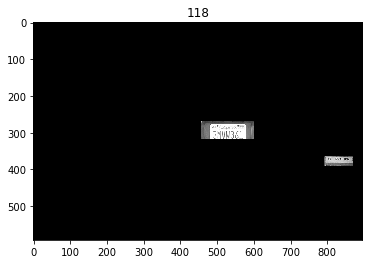

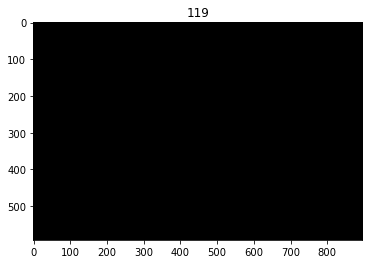

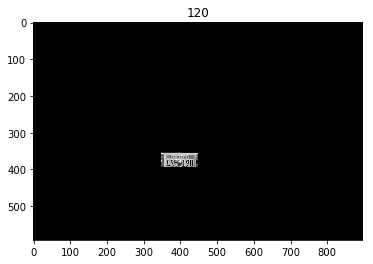

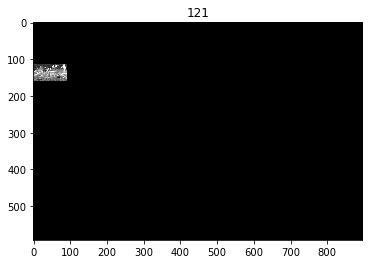

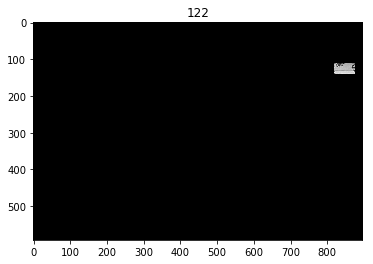

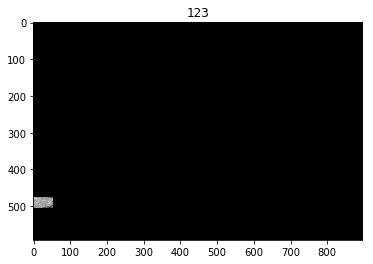

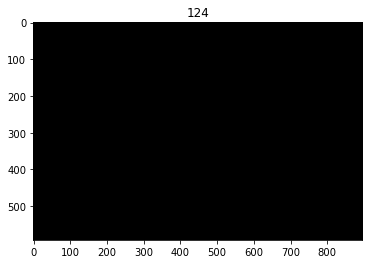

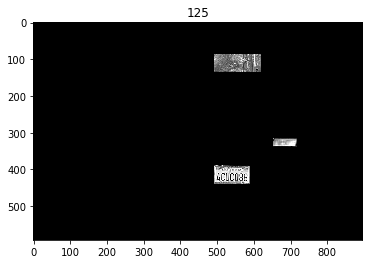

In [9]:
def possible_plates(image):
    original_img = image
    img = original_img
    img = cv2.GaussianBlur(img, (11,11), 20)
    img = cv.thresh(img,115, 255, cv2.THRESH_BINARY)
    contours = cv.findContours(img)
    contours = cv.getLargeContours(contours,original_img.shape)
    possible_plate_contours = []
    for i in range(len(contours)):
        x,y,w,h = cv2.boundingRect(contours[i])
        aspect = cv.aspectRatio(w,h)
        if (aspect > 1.8) and (aspect < 3):
            possible_plate_contours.append(contours[i])
    blank_img = np.zeros(image.shape)
    if len(possible_plate_contours) != 0:
        sub_images = []
        for contour in possible_plate_contours:
            x,y,w,h = cv2.boundingRect(contour)
            #sub_images.append(original_img[y:y+h,x:x+w])
            blank_img[y:y+h,x:x+w] = original_img[y:y+h,x:x+w]
        #return sub_images
    return blank_img


for i in range(80,126):
    cv.draw(possible_plates(images[i]),title=str(i))
#cv.draw(possible_plates(images[1]),title=str(0))

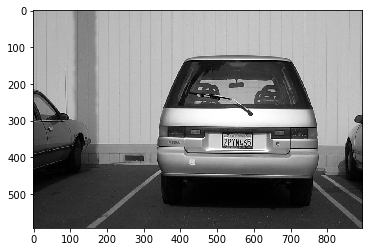

In [10]:
cv.draw(images[116])

In [ ]:

for c in cv.getLargeContours(contours,img.shape):
    epsilon = 0.08 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)
    original = cv2.drawContours(np.ones(img.shape),[c] , -1, (0, 255, 0), 4)
    approximated = cv2.drawContours(np.ones(img.shape), [approx], -1, (0, 255, 0), 4)
    cv.display([original,approximated])
